# lab1 part 2 

In [1]:
import numpy as np 


In [2]:
#not specifying size doesnt allow data to be partioned within a range uniformly
data = np.random.uniform(-1 , 1 , size = None )

In [3]:
#specifying size '1000' gives us that many uniform divisions within the given lower limit and upperlimit 
data1 = np.random.uniform(-10 , 10 , 1000)

In [4]:
type(data1)


numpy.ndarray

In [5]:
type(data)


float

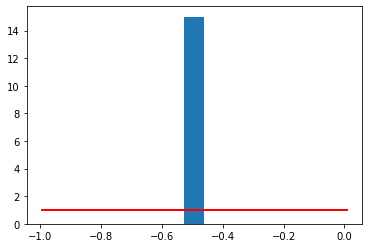

In [6]:
#clearly not specifying size argument in random() led to complete data getting segmented to a single bin 
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

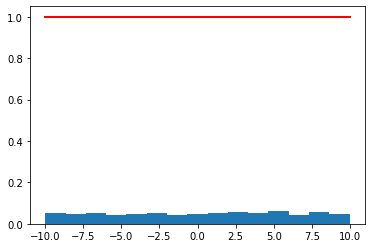

In [7]:
# plotting histogram with uniformity line to show that the data gets uniformly distributed using random.uniform()
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(data1, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()



# lab1 pt1

In [8]:
import pandas as pd 
df = pd.read_csv('C:/Users/user/Desktop/raw-material-properties.csv')

In [9]:
df.head(10)

,Sample,size1,size2,size3,density1,density2,density3
0,X12558,0.696,2.69,6.38,41.8,17.18,3.90
1,X14728,0.636,2.30,5.14,38.1,12.73,3.89
2,X15468,0.841,2.85,5.20,37.6,13.58,3.98
3,X21364,0.609,2.13,4.62,34.2,11.12,4.02
4,X23671,0.684,2.16,4.87,36.4,12.24,3.92
5,X24055,0.762,2.81,6.36,38.1,13.28,3.89
6,X24905,0.552,2.34,5.03,41.3,16.71,3.86
7,X25917,0.501,2.17,5.09,NaN,NaN,NaN
8,X27871,0.619,2.11,5.13,NaN,NaN,NaN
9,X28690,0.610,2.10,4.18,35.0,12.15,3.86


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    36 non-null     object 
 1   size1     35 non-null     float64
 2   size2     35 non-null     float64
 3   size3     35 non-null     float64
 4   density1  26 non-null     float64
 5   density2  26 non-null     float64
 6   density3  26 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


# size1 , size2 , size3 , Density 1 , Density 2 , Density 3 have missing values .

<AxesSubplot:>

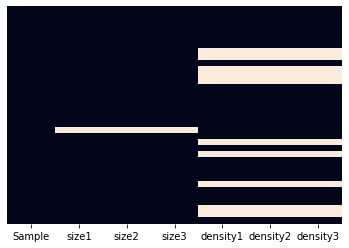

In [11]:
#DATA CLEANING VIA heatmap
import seaborn as sns 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
#alternative to check number of missing values in dataset 
df.isnull().sum()

Sample       0
size1        1
size2        1
size3        1
density1    10
density2    10
density3    10
dtype: int64

In [3]:
#alternative fillna( ) to remove null values with mean of respective columns .
alternative_df = df.copy()
#we have to see what datatypes are our features or variables in dataset from info() above and replace null values accordingly 
alternative_df['size1'].fillna(method= 'ffill', inplace = True )
alternative_df['size2'].fillna(method = 'ffill', inplace = True )
alternative_df['size3'].fillna(method='ffill', inplace = True )
alternative_df['density1'].fillna(method='ffill', inplace = True )
alternative_df['density2'].fillna(method='ffill', inplace = True )
alternative_df['density3'].fillna(method='ffill', inplace = True )

NameError: name 'df' is not defined

In [66]:
alternative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    36 non-null     object 
 1   size1     36 non-null     float64
 2   size2     36 non-null     float64
 3   size3     36 non-null     float64
 4   density1  36 non-null     float64
 5   density2  36 non-null     float64
 6   density3  36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


In [67]:
#checking if null values are present anymore 
alternative_df.isnull().sum()

Sample      0
size1       0
size2       0
size3       0
density1    0
density2    0
density3    0
dtype: int64

# No null values present , now we will try this using imputer module of sklearn , which will require much less lines of code to efficiently perform the functionality of removing null values and replacing it .

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    36 non-null     object 
 1   size1     35 non-null     float64
 2   size2     35 non-null     float64
 3   size3     35 non-null     float64
 4   density1  26 non-null     float64
 5   density2  26 non-null     float64
 6   density3  26 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


In [42]:
#remove missing values using simple imputer module and replace it with most frequent element in the respective features 
import numpy as np
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # strategy can be mean , median , most_frequent depending on requiremnets.
impute.fit(df)
X=impute.transform(df)

In [53]:
 df.columns.values
columns = ['Sample', 'size1', 'size2', 'size3', 'density1', 'density2',
       'density3']

<AxesSubplot:xlabel='None'>

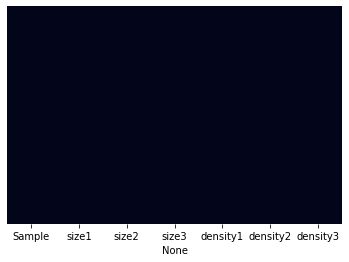

In [54]:
#now check heatmap to see missing values 

import seaborn as sns 
new_df = pd.DataFrame(X , columns= columns_values)
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False)

In [55]:
#here we can clearly see noo null values in the data frame and hence the lab requirements are successfully accomplished .

# dealing with categorical columns 

In [68]:
alternative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    36 non-null     object 
 1   size1     36 non-null     float64
 2   size2     36 non-null     float64
 3   size3     36 non-null     float64
 4   density1  36 non-null     float64
 5   density2  36 non-null     float64
 6   density3  36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


In [77]:
alternative_df['Sample'].unique()

array(['X12558', 'X14728', 'X15468', 'X21364', 'X23671', 'X24055',
       'X24905', 'X25917', 'X27871', 'X28690', 'X31385', 'X31813',
       'X32807', 'X33943', 'X35035', 'X39223', 'X40503', 'X41400',
       'X42988', 'X44749', 'X45295', 'X46965', 'X49666', 'X50678',
       'X52894', 'X53925', 'X54254', 'X54272', 'X54394', 'X55408',
       'X56952', 'X57095', 'X57128', 'X61870', 'X61888', 'X72736'],
      dtype=object)

In [78]:
from sklearn import preprocessing 
  
# label_encoder because too many nominal categories.
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Sample'. 
alternative_df['Sample']= label_encoder.fit_transform(alternative_df['Sample']) 
  
alternative_df['Sample'].unique() 
  

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [79]:
import matplotlib.pyplot as plt
sns.set()

<AxesSubplot:>

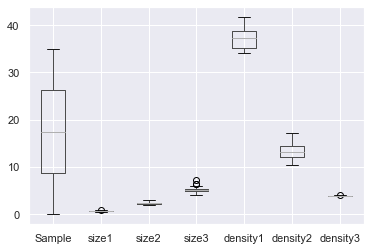

In [80]:
alternative_df.boxplot()

# train test split 

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
y = alternative_df['density3']
X =alternative_df.drop(['density3'] , axis=1)


# feature scaling

In [104]:
from sklearn.preprocessing import StandardScaler


In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
x_scaled = scaler.transform(X)

In [110]:
x_scaled

array([[-1.68458833e+00,  2.25065368e-01,  1.41144544e+00,
         1.94070441e+00,  2.12671863e+00,  2.26767544e+00],
       [-1.58832614e+00, -4.26598432e-01, -1.99667892e-01,
        -1.21987134e-01,  3.82390295e-01, -4.35916177e-01],
       [-1.49206395e+00,  1.79991955e+00,  2.07241502e+00,
        -2.21794789e-02,  1.46670250e-01,  8.05001999e-02],
       [-1.39580176e+00, -7.19847142e-01, -9.01948064e-01,
        -9.86986812e-01, -1.45622606e+00, -1.41406955e+00],
       [-1.29953957e+00,  9.47326080e-02, -7.78016269e-01,
        -5.71121582e-01, -4.19057858e-01, -7.33615030e-01],
       [-1.20327738e+00,  9.41895548e-01,  1.90717262e+00,
         1.90743519e+00,  3.82390295e-01, -1.01764404e-01],
       [-1.10701519e+00, -1.33892775e+00, -3.44254986e-02,
        -3.04967835e-01,  1.89099858e+00,  1.98212756e+00],
       [-1.01075300e+00, -1.89284198e+00, -7.36705671e-01,
        -2.05160180e-01,  1.89099858e+00,  1.98212756e+00],
       [-9.14490807e-01, -6.11236509e-01, -9.845

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)